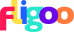

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**
- During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
- In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - Feature extraction: Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
  - Machine Learning modeling: at least one fitted model with the given data. You could use the `children` column as target.
- Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Dockerfile to setup environment / Conda environment for isolation.
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.


<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

## Part I - Exploratory Data Analisys

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix

In [2]:
hotels_df = pd.read_csv("https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv")

In [3]:
hotels_df.sample(5)

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
17546,City_Hotel,102,2,2,2,none,BB,PRT,Offline_TA/TO,TA/TO,...,D,D,0,No_Deposit,0,Transient,82.45,none,0,2016-07-10
18687,Resort_Hotel,147,2,6,1,none,HB,FRA,Direct,Direct,...,A,A,0,No_Deposit,0,Transient-Party,88.00,none,0,2016-04-08
8995,Resort_Hotel,57,0,1,2,none,BB,DEU,Offline_TA/TO,TA/TO,...,D,E,0,No_Deposit,0,Transient,95.00,none,0,2016-05-26
46086,Resort_Hotel,4,0,2,2,none,BB,PRT,Complementary,Direct,...,A,D,0,No_Deposit,0,Transient,0.00,none,0,2015-12-11
40222,Resort_Hotel,6,0,2,2,none,BB,PRT,Direct,Direct,...,A,A,0,No_Deposit,0,Transient,44.00,none,1,2017-01-13


In [4]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   lead_time                       50000 non-null  int64  
 2   stays_in_weekend_nights         50000 non-null  int64  
 3   stays_in_week_nights            50000 non-null  int64  
 4   adults                          50000 non-null  int64  
 5   children                        50000 non-null  object 
 6   meal                            50000 non-null  object 
 7   country                         49711 non-null  object 
 8   market_segment                  50000 non-null  object 
 9   distribution_channel            50000 non-null  object 
 10  is_repeated_guest               50000 non-null  int64  
 11  previous_cancellations          50000 non-null  int64  
 12  previous_bookings_not_canceled  

In [5]:
num_cols = list(hotels_df.describe().columns)
cat_cols = [ c for c in hotels_df.columns if not c in num_cols ]

Here with extracted potencial numeric columns (`num_cols`) and categorical columns (`cat_cols`)

<Axes: ylabel='children'>

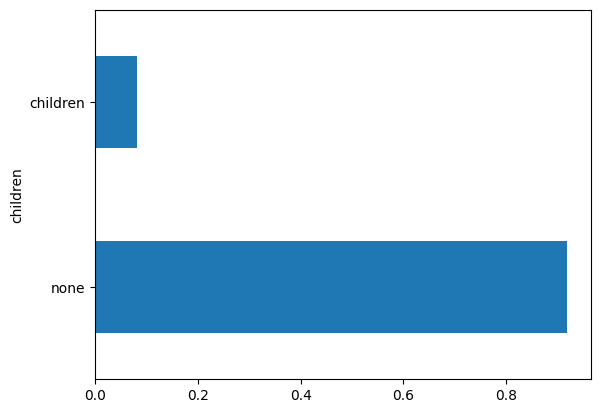

In [6]:
hotels_df["children"].value_counts(normalize=True).plot(kind="barh")

NOTES:
- `children` presents an unbalanced issue as it has two classes. The class `none` represents almost the 92% of the total with 45962 samples and the class `children` represents 8% of the total with 4038 samples.

In [7]:
hotels_df[cat_cols + num_cols].sample(10).T

,46678,23066,2604,1813,39117,36769,10685,31292,49067,18024
hotel,City_Hotel,Resort_Hotel,City_Hotel,City_Hotel,Resort_Hotel,City_Hotel,Resort_Hotel,City_Hotel,Resort_Hotel,Resort_Hotel
children,none,none,none,none,none,none,none,none,none,none
meal,BB,BB,BB,BB,BB,HB,BB,BB,BB,BB
country,GBR,IRL,PRT,FRA,PRT,DEU,PRT,PRT,PRT,ESP
market_segment,Online_TA,Offline_TA/TO,Online_TA,Online_TA,Corporate,Offline_TA/TO,Online_TA,Direct,Online_TA,Direct
distribution_channel,TA/TO,TA/TO,TA/TO,TA/TO,Corporate,TA/TO,TA/TO,Direct,TA/TO,Direct
reserved_room_type,E,A,A,D,A,A,A,A,A,A
assigned_room_type,E,E,A,D,A,B,A,D,A,A
deposit_type,No_Deposit,No_Deposit,No_Deposit,No_Deposit,No_Deposit,No_Deposit,No_Deposit,No_Deposit,No_Deposit,No_Deposit
customer_type,Transient,Transient,Transient,Transient,Contract,Transient-Party,Transient,Group,Transient,Transient


Descriptions:

Categorical Columns:

- `hotel`: it could be a potencial feature as it can provide information about the which hotel.
- `children`: it represents if whether bring children or not and it is the target and it presents an unbalanced problem as it has 92% of none children and 8% of books that bring children.
- `meal`: Type of meal booked. Categories are presented in standard hospitality meal packages. In the data we can find that `Undefined` and `SC` are separate so we can join this two categories as they have the same meaning.
    - Undefined/SC – no meal package;
    - BB – Bed & Breakfast;
    - HB – Half board (breakfast and one other meal – usually dinner);
    - FB – Full board (breakfast, lunch and dinner)
- `country`: Country of origin. Categories are represented in the ISO 3155–3:2013 format. This column has a lot of categories so we can evaluate applying grouping on these categories.
- `market_segment`: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
    - Online_TA        
    - Offline_TA/TO    
    - Direct            
    - Groups            
    - Corporate         
    - Complementary      
    - Aviation           
- `distribution_channel`: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
    - TA/TO        
    - Direct        
    - Corporate     
    - GDS            
    - Undefined       
- `reserved_room_type`: Code of room type reserved. Code is presented instead of designation for anonymity reasons. Categories: ['A', 'D', 'F', 'C', 'B', 'E', 'G', 'H', 'L']
- `assigned_room_type`: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. Categories: ['A', 'K', 'F', 'C', 'D', 'E', 'I', 'B', 'G', 'H']
- `deposit_type`: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    - No Deposit – no deposit was made;
    - Non Refund – a deposit was made in the value of the total stay cost;
    - Refundable – a deposit was made with a value under the total cost of stay.
- `customer_type`: Type of booking, assuming one of four categories:
    - Contract - when the booking has an allotment or other type of contract associated to it;
    - Group – when the booking is associated to a group;
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
- `required_car_parking_spaces`: categorical column that indicates if if whether car parking spaces required by the customer or not. Categories: ['none', 'parking']
- `is_repeated_guest`: Value indicating if the booking name was from a repeated guest (1) or not (0). Categories: [0, 1]

Numerical:
- `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- `stays_in_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- `stays_in_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- `adults`: Number of adults.
- `previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking.
- `previous_bookings_not_canceled`: Number of previous bookings not cancelled by the customer prior to the current booking.
- `booking_changes`: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- `days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer.
- `average_daily_rate`: Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
- `total_of_special_requests`: Number of special requests made by the customer (e.g. twin bed or high floor). Sum of all special requests.

Special:
- `arrival_date`: date of which the customer arrived.

After checking meaning of each column we can reorganize as follow:
- `is_repeated_guest` can be consider as categorical it has just two possible options: `1` or `0`
- `arrival_date` can be splitted in year, month and day columns or it can have another treatment, so we are going to consider this column as special to analize it later.

In [8]:
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled', 
            'booking_changes', 'days_in_waiting_list', 'average_daily_rate', 'total_of_special_requests']
cat_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
            'deposit_type', 'customer_type', 'required_car_parking_spaces','is_repeated_guest']
special_cols = ['arrival_date']

## Numerical Columns

In [9]:
hotels_df[num_cols].isna().sum()

lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
average_daily_rate                0
total_of_special_requests         0
dtype: int64

NOTES:
- For numeric columns we don't have NA values.

In [10]:
hotel_num_test = hotels_df[num_cols + ["children"]].copy()
hotel_num_test["children"] = hotel_num_test["children"].apply(lambda x : 1 if x=="children" else 0)

Include `total_nights` as a new feature to explore the relationship with `children`

In [11]:
hotel_num_test["total_nights"] = hotel_num_test["stays_in_week_nights"] + hotel_num_test["stays_in_weekend_nights"]
num_cols = num_cols + ["total_nights"]

In [12]:
desc_df = hotel_num_test[num_cols].describe()
desc_df.style.applymap(lambda val : 'background-color: red' if val == 0 else '')

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests,total_nights
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,80.094120,0.928520,2.464540,1.830280,0.016740,0.202740,0.294960,1.570400,99.942342,0.712660,3.393060
std,91.201362,0.996288,1.936176,0.509078,0.287857,1.803691,0.740006,14.790300,49.039092,0.833804,2.592809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000,2.000000
50%,45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,92.500000,1.000000,3.000000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,125.000000,1.000000,4.000000
max,709.000000,19.000000,50.000000,4.000000,13.000000,72.000000,21.000000,379.000000,510.000000,5.000000,69.000000


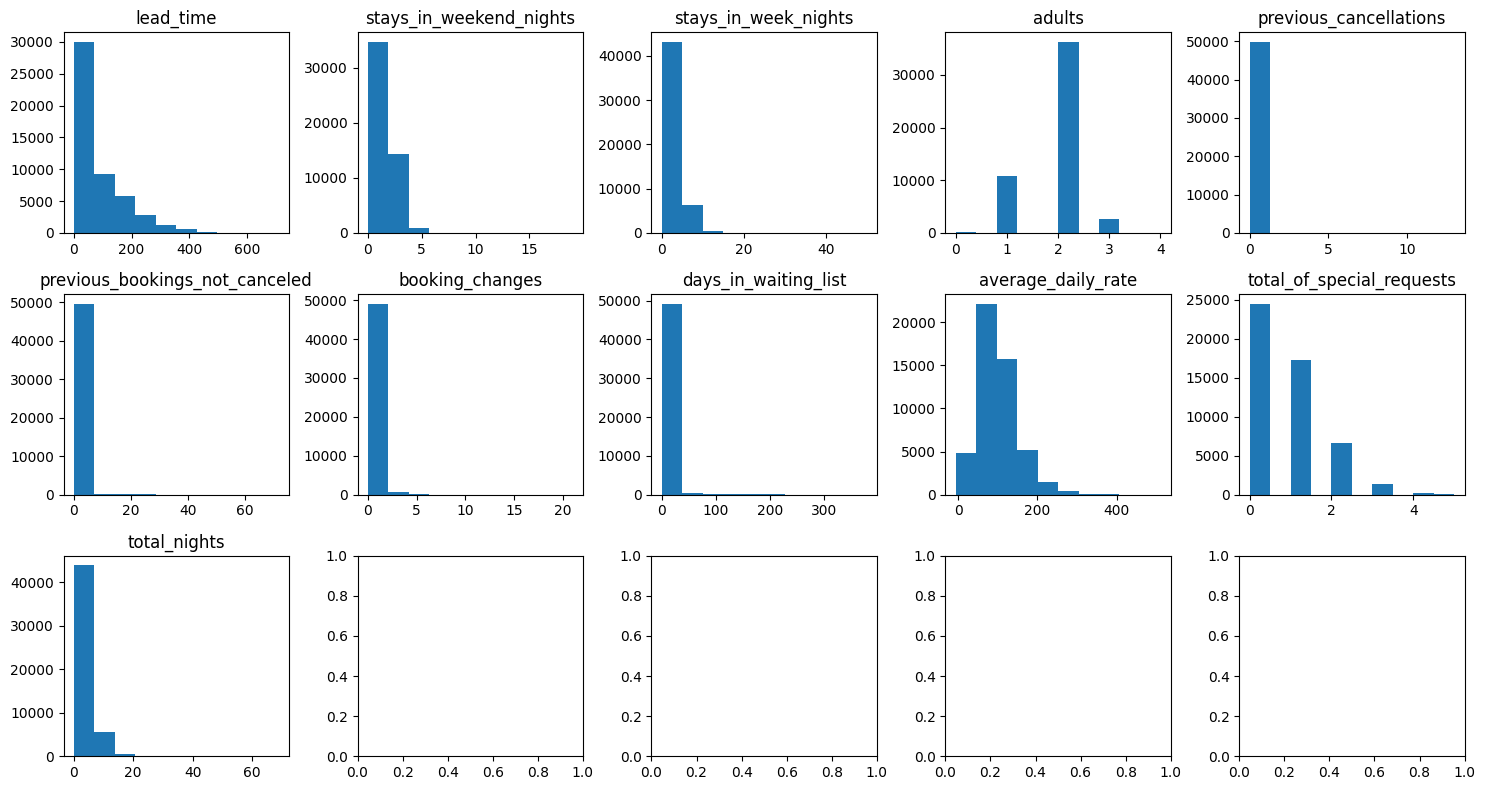

In [13]:
fig, axs = plt.subplots(3, 5, figsize=(15, 8))
axs = axs.flatten()

for col, ax in list(zip(num_cols, axs)):
    ax.hist(hotel_num_test[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

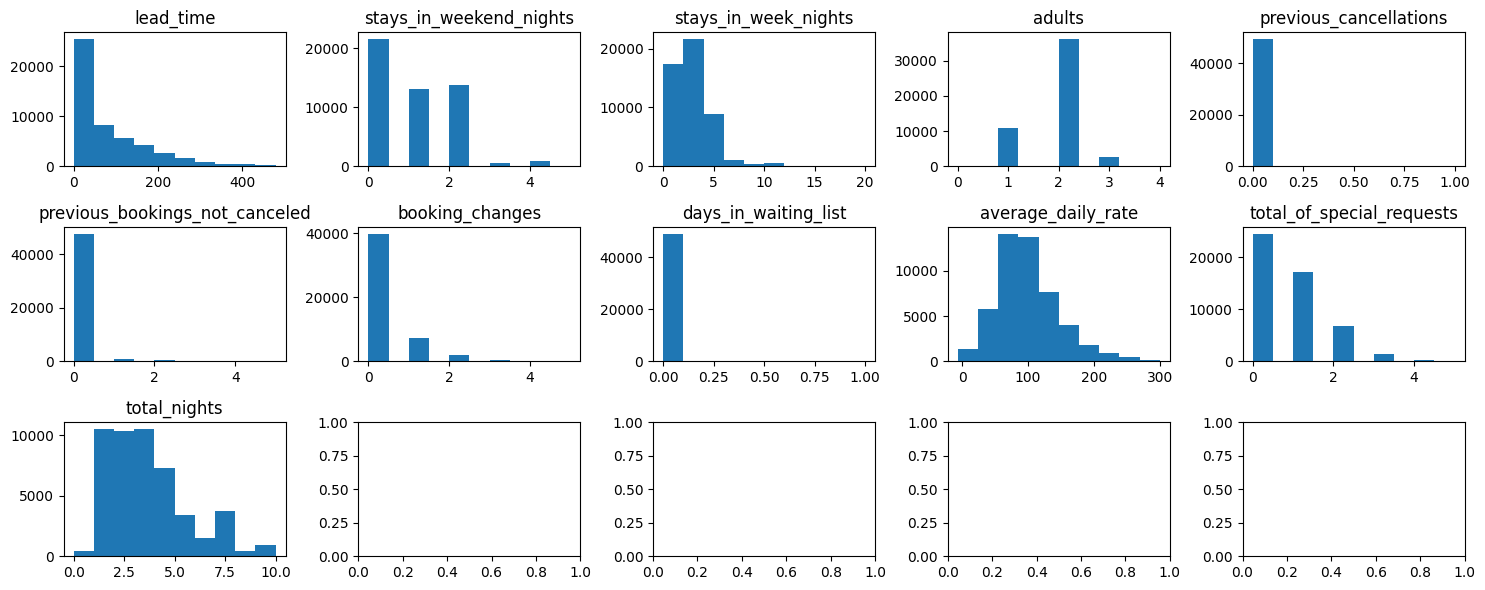

In [14]:
fig, axs = plt.subplots(3, 5, figsize=(15, 6))
axs = axs.flatten()

limits = {
    'lead_time': 500,
    'stays_in_weekend_nights': 5,
    'stays_in_week_nights': 20,
    'adults': np.inf,
    'previous_cancellations': 1,
    'previous_bookings_not_canceled': 5,
    'booking_changes': 5,
    'days_in_waiting_list': 1,
    'average_daily_rate': 300,
    'total_of_special_requests': np.inf,
    'total_nights': 10
}

for col, ax in list(zip(num_cols, axs)):
    ax.hist(hotel_num_test[hotel_num_test[col] <= limits[col]][col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

#### "zero adults and none children is odd" issue

In [15]:
hotel_num_test["adults"].value_counts()

adults
2    36271
1    10831
3     2675
0      194
4       29
Name: count, dtype: int64

In [16]:
hotel_num_test[hotel_num_test["adults"] == 0][["children"]].describe()

,children
count,194.000000
mean,0.458763
std,0.499586
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


NOTES:
- The fact that a booking has zero adults and none children is odd. I'm going to put a assumption that an adult would book a hotel for their child but I'm going to removed samples that has zero adults and none children. Either way, this would be a question for business.

In [17]:
hotel_num_test = hotel_num_test[~((hotel_num_test["adults"]==0) & (hotel_num_test["children"]==0))]

#### Predictability of features

NOTES:
- We can conclude that [`previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`] are colums that as numeric columns does not provide value because theis `standar deviation` is really low.

In [18]:
num_cols_new = ["lead_time","adults","average_daily_rate","total_of_special_requests","total_nights"]
hotel_num_test = hotel_num_test[num_cols_new + ["children"]]

In [19]:
hotel_num_test = hotel_num_test[hotel_num_test["lead_time"] <= 500]
hotel_num_test = hotel_num_test[hotel_num_test["average_daily_rate"] <= 300]
hotel_num_test = hotel_num_test[hotel_num_test["total_nights"] <= 10]

In [20]:
len(hotel_num_test)

48860

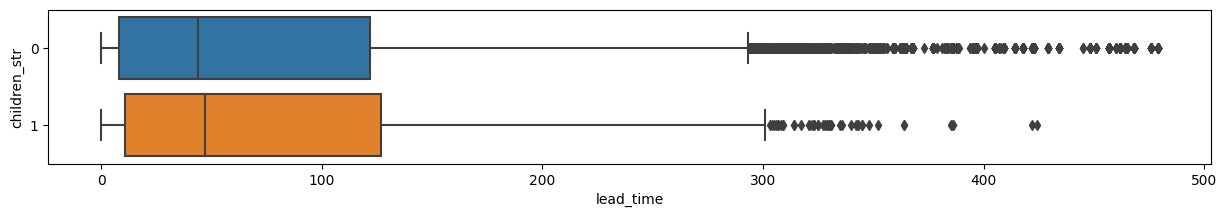

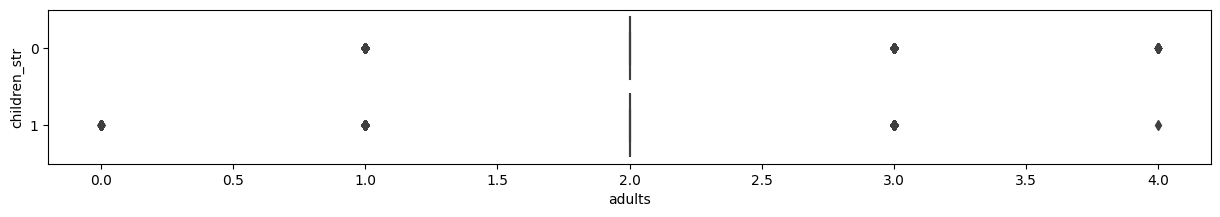

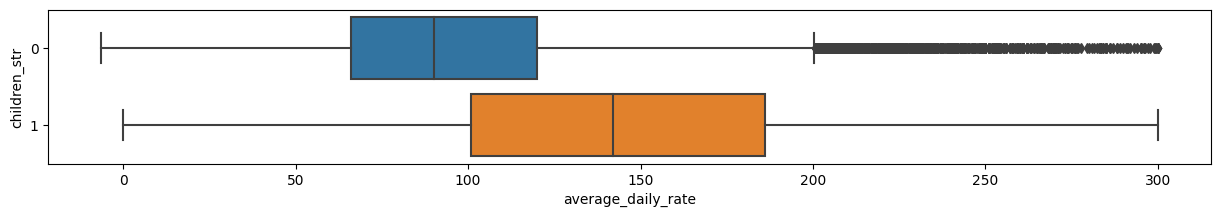

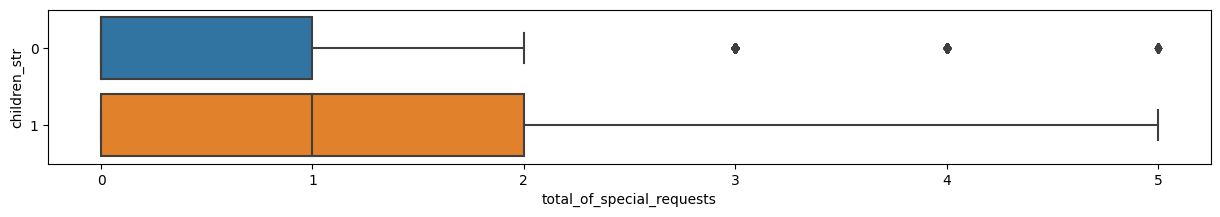

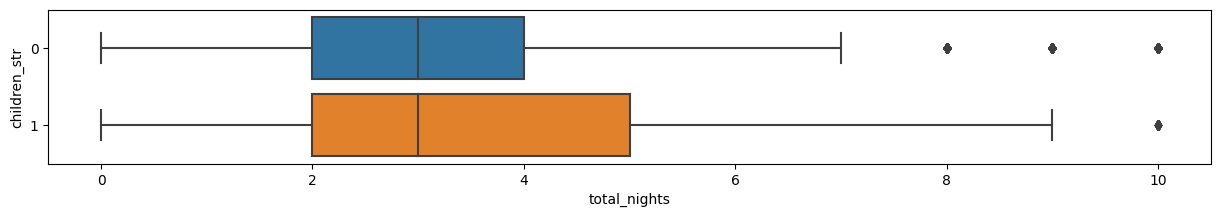

In [21]:
hotel_num_test["children_str"] = hotel_num_test["children"].apply(str)

for col in num_cols_new:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=col, y='children_str', data=hotel_num_test)
    plt.show()

In [22]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X, y = hotel_num_test[num_cols_new].values, hotel_num_test["children"].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=1e-3) 
lasso.fit(X_train_scaled, y)
selected_features = sorted([(col,np.abs(coef)) for col, coef in zip(num_cols_new, lasso.coef_) if coef != 0], key=lambda x : x[1], reverse=True)
selected_features

[('average_daily_rate', 0.07273237527191913),
 ('total_of_special_requests', 0.022540349604286507),
 ('adults', 0.008974224264105574),
 ('total_nights', 0.005057957092197271),
 ('lead_time', 0.004942919723318381)]

lead_time: 0.30767478500097295
adults: 0.05258640636912257
average_daily_rate: 0.48233369582255603
total_of_special_requests: 0.04762422171190213
total_nights: 0.10978089109544643


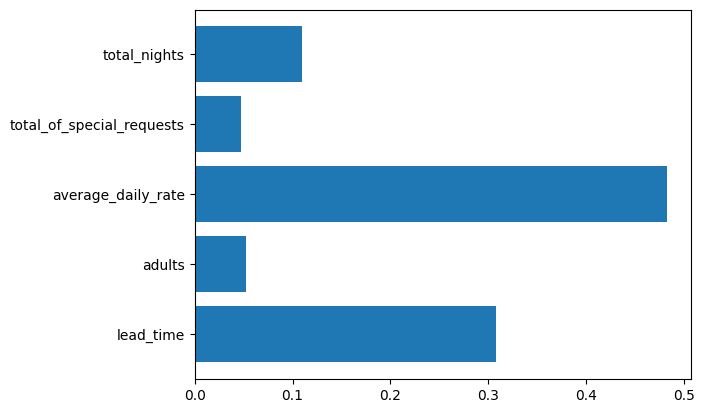

In [23]:
from sklearn.tree import DecisionTreeClassifier

X, y = hotel_num_test[num_cols_new].values, hotel_num_test["children"].values
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_

for col,score in zip(num_cols_new, importance):
    print(f"{col}: {score}")

plt.barh(num_cols_new, importance)
plt.show()

#### Conclusions:

- The important features so far are [`lead_time`, `adults`, `average_daily_rate`, `total_of_special_requests`, `total_nights`]
- The transformation for this set of data is the following: 
    - `lead_time` <= 300
    - `average_daily_rate` <= 300
    - `total_nights` <= 10
- Explore the posibility of convert these numerical features into categorical features: [`previous_cancellations`, `booking_changes`, `days_in_waiting_list`]

## Categorical Columns

In [24]:
hotel_cat_test = hotels_df[cat_cols + ["children"]]

In [25]:
hotel_cat_test[cat_cols].isna().sum()

hotel                            0
meal                             0
country                        289
market_segment                   0
distribution_channel             0
reserved_room_type               0
assigned_room_type               0
deposit_type                     0
customer_type                    0
required_car_parking_spaces      0
is_repeated_guest                0
dtype: int64

NOTES:
- `country` is the only column that presents nan values.

Adding new columns based on [`previous_cancellations`, `booking_changes`, `days_in_waiting_list`]

In [27]:
# Adding new columns

hotel_cat_test.loc[:,"has_cancellations"] = hotels_df["previous_cancellations"].apply(lambda x : "0" if x == 0 else "1")
hotel_cat_test.loc[:,"has_booking_changes"] = hotels_df["booking_changes"].apply(lambda x : "0" if x == 0 else "1")
hotel_cat_test.loc[:,"been_in_waiting_list"] = hotels_df["days_in_waiting_list"].apply(lambda x : "0" if x == 0 else "1")

cat_cols_new = cat_cols + ["has_cancellations","has_booking_changes","been_in_waiting_list"]

NOTES: 
- Fix column `meal`: as `SC` and `Undefined` are the same we are going group both categories as the same category (based on [Hotel booking demand Article](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub))

In [28]:
# Fix Column `meal`

hotel_cat_test.loc[:,"meal"] = hotel_cat_test["meal"].apply(lambda x : "Undefined/SC" if x in ["SC","Undefined"] else x)
hotel_cat_test["meal"].value_counts()

meal
BB              38316
HB               6399
Undefined/SC     5074
FB                211
Name: count, dtype: int64

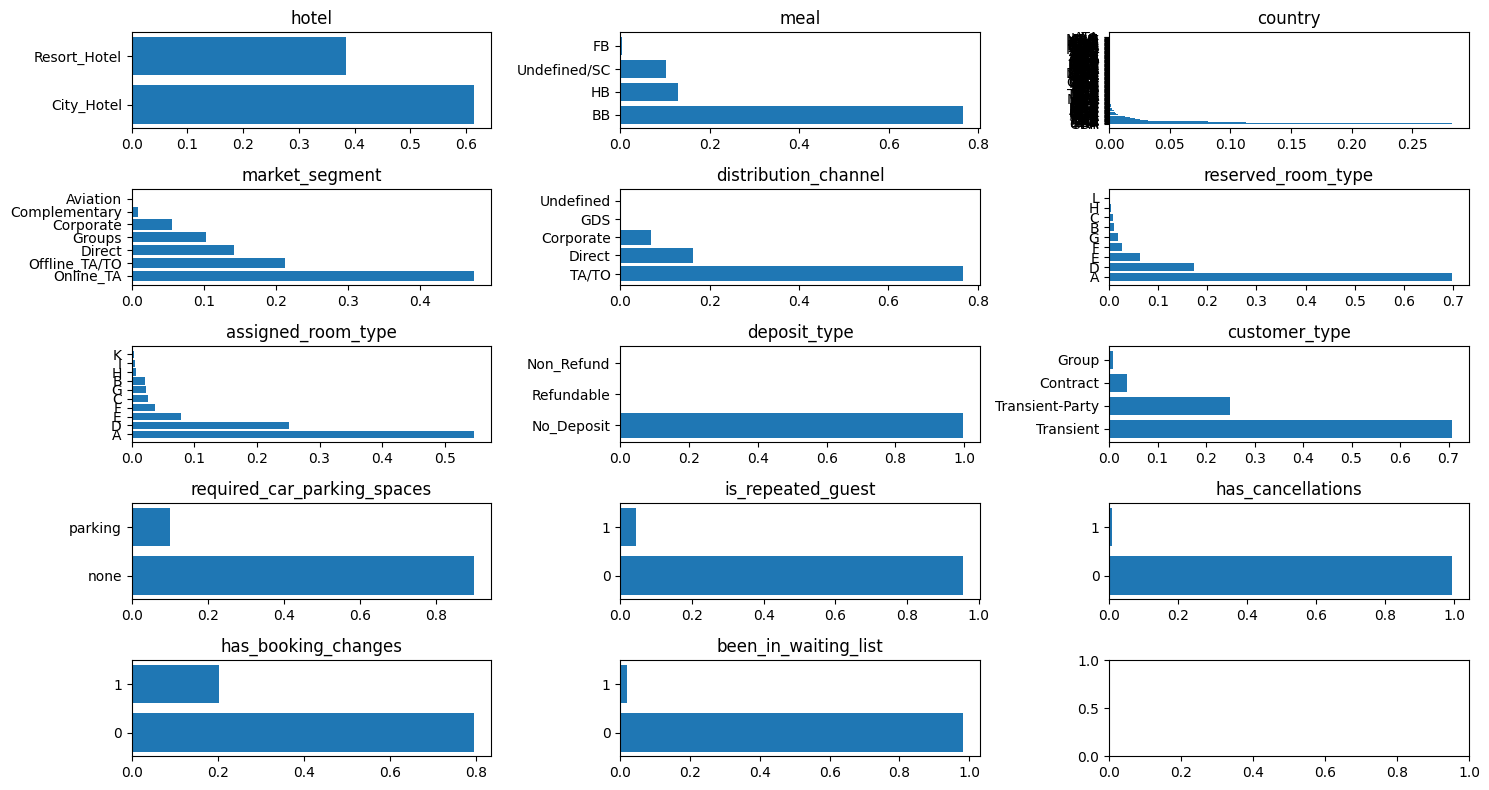

In [29]:
fig, axs = plt.subplots(5, 3, figsize=(15, 8))
axs = axs.flatten()

for col, ax in list(zip(cat_cols_new, axs)):
    vc = hotel_cat_test[col].value_counts(normalize=True)
    ax.barh(vc.index, vc.values)
    ax.set_title(col)

plt.tight_layout()
plt.show()

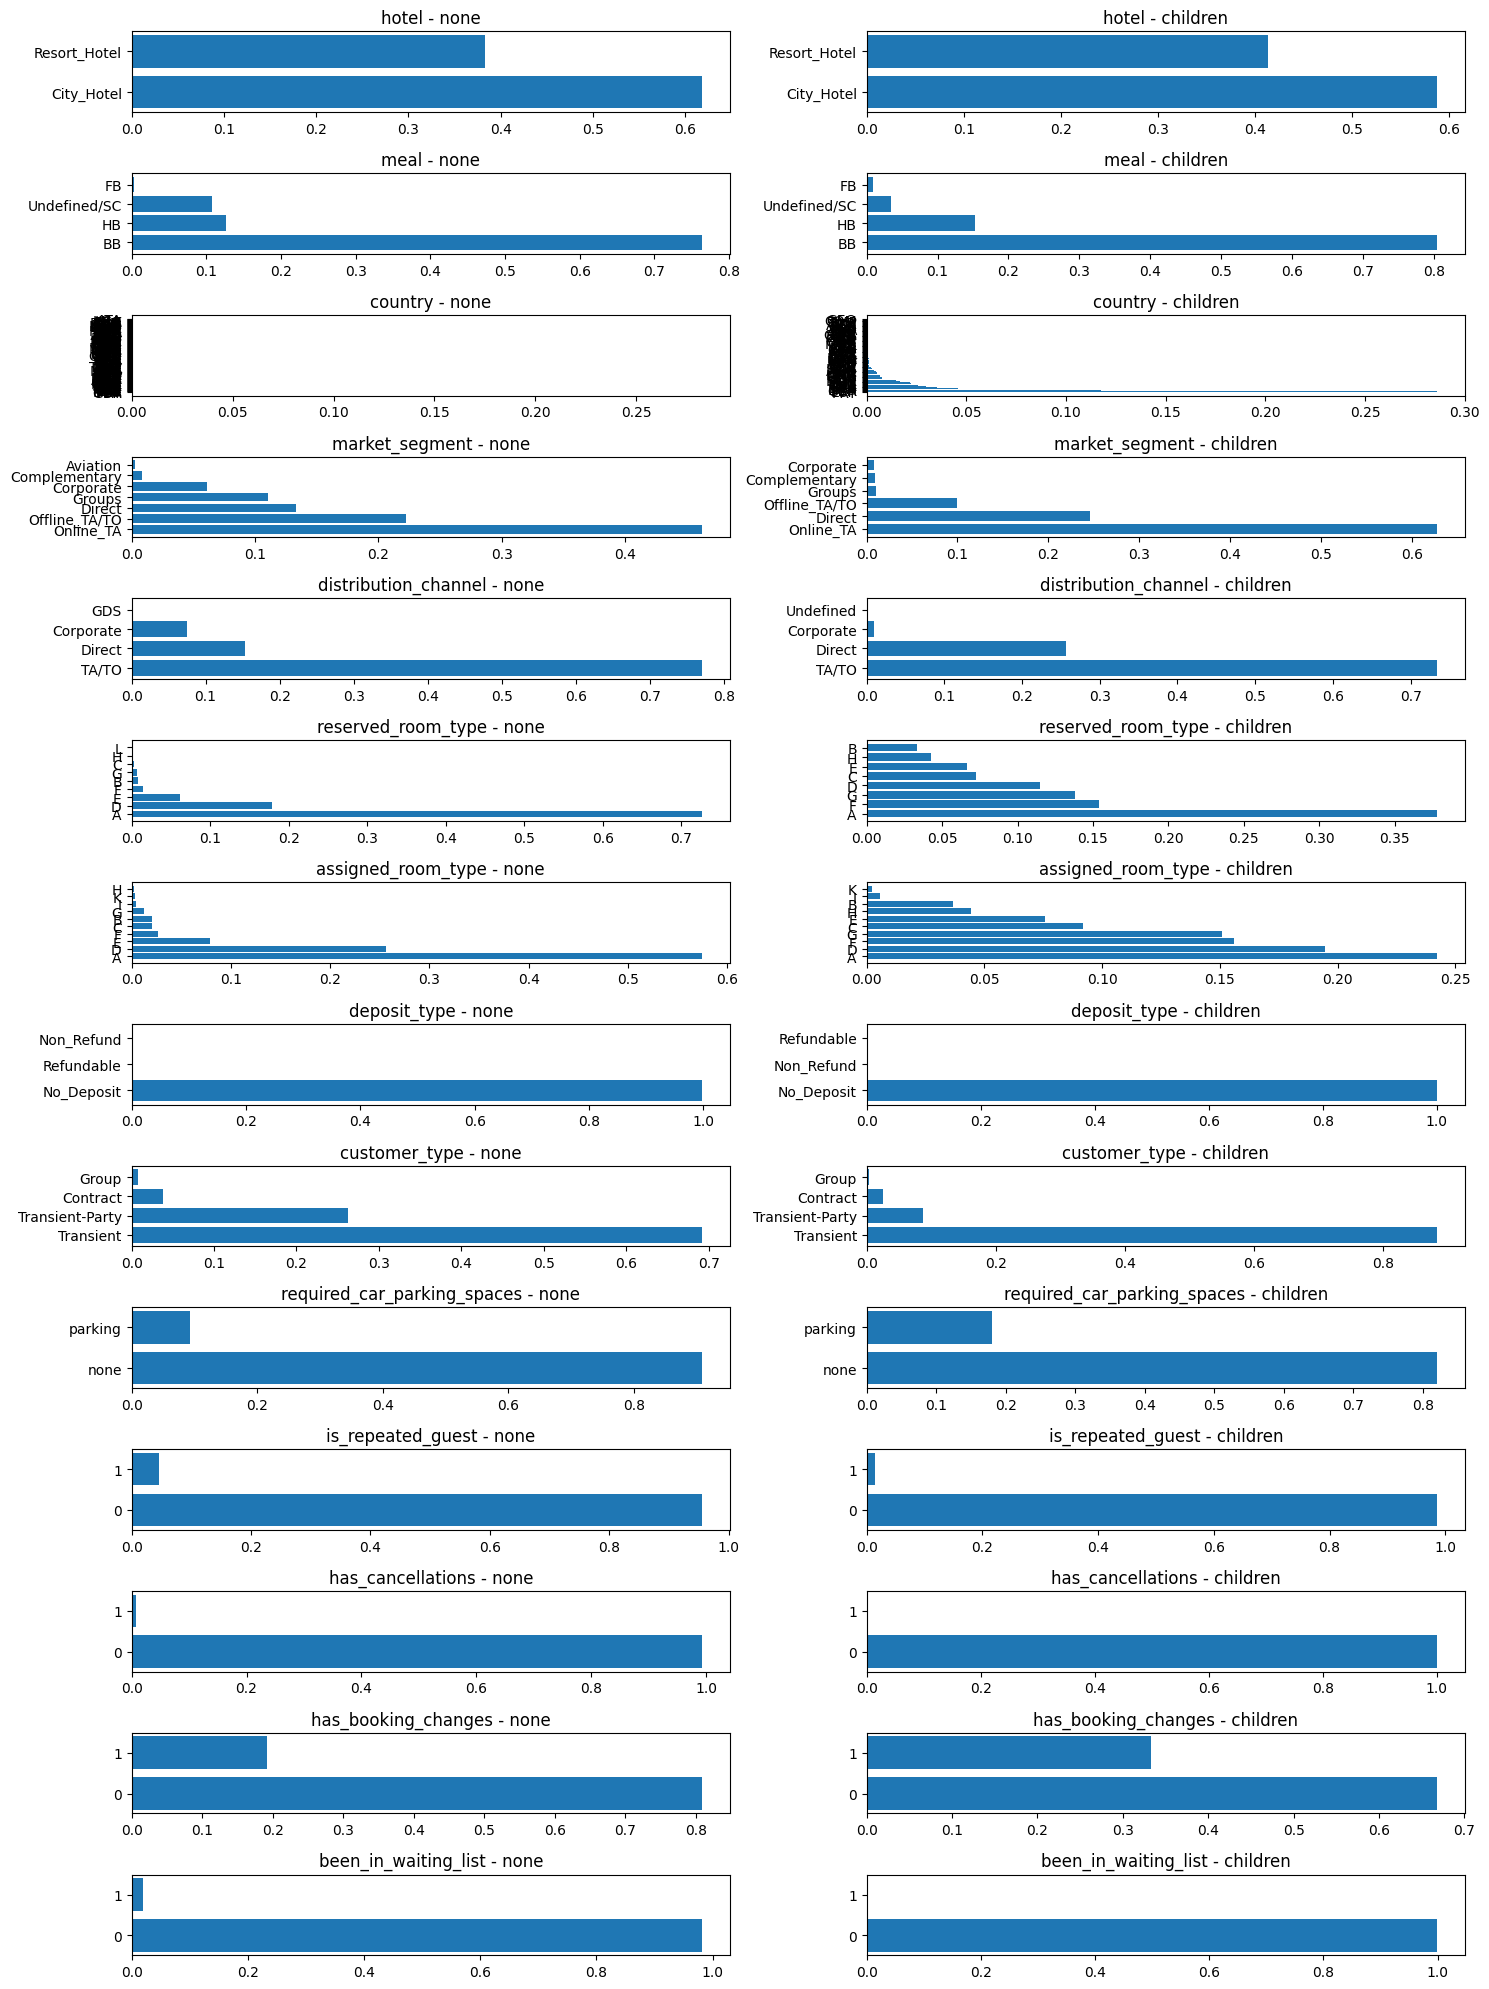

In [30]:
fig, axs = plt.subplots(14, 2, figsize=(15, 20))
axs = axs.flatten()
axs = [(axs[i], axs[i + 1]) for i in range(0, len(axs), 2)]

for col, ax in list(zip(cat_cols_new, axs)):
    vc = hotel_cat_test[hotel_cat_test["children"]=="none"][col].value_counts(normalize=True)
    ax[0].barh(vc.index, vc.values)
    ax[0].set_title(f"{col} - none")

    vc = hotel_cat_test[hotel_cat_test["children"]=="children"][col].value_counts(normalize=True)
    ax[1].barh(vc.index, vc.values)
    ax[1].set_title(f"{col} - children")

plt.tight_layout()
plt.show()

NOTES:
- `country`: removing this column since it has a lot of NaNs (289) and it adds noise to the final target as it has a lot of categories. We can evaluate grouping countries in sections.
- `deposit_type`: removing this column since it prensents a unbalance issue. `No_Deposit` category is overlapping the others categories.
- `is_repeated_guest`: removing this column since it prensents a unbalance issue. `0` category is overlapping the others categories.
- `has_cancellations`: removing this column since it prensents a unbalance issue. `0` category is overlapping the others categories.
- `been_in_waiting_list`: removing this column since it prensents a unbalance issue. `0` category is overlapping the others categories.

In [31]:
cat_cols_new = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'required_car_parking_spaces', 'has_booking_changes']

#### Chi2 Test

In [32]:
def chi2_test(df, col1, col2, alpha=0.05): 
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p < alpha

In [33]:
chi2_target = { c: [chi2_test(hotel_cat_test, c, "children")] for c in cat_cols_new }
pd.DataFrame(chi2_target, index=["h1"]).T.style.applymap(lambda val : 'background-color: red' if val == False else 'background-color: green')

,h1
hotel,True
meal,True
market_segment,True
distribution_channel,True
reserved_room_type,True
assigned_room_type,True
customer_type,True
required_car_parking_spaces,True
has_booking_changes,True


NOTES:
- These columns: [`hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `customer_type`, `required_car_parking_spaces`, `has_booking_changes`] passed the test of chi2 as "reject the null hypothesis". This would suggest that there is a significant association between this columns and `children`.

## Special Columns

In [34]:
hotel_special_test = hotels_df[special_cols + ["children"]].copy()

In [35]:
hotel_special_test.sample(5)

,arrival_date,children
4972,2016-06-16,none
14697,2016-11-21,none
39900,2016-08-17,none
10386,2015-09-14,none
45853,2015-08-04,none


In [36]:
hotel_special_test["arrival_date"] = pd.to_datetime(hotel_special_test["arrival_date"])
hotel_special_test.loc[:,"arrival_year"] = hotel_special_test["arrival_date"].dt.year
hotel_special_test.loc[:,"arrival_month"] = hotel_special_test["arrival_date"].dt.month
hotel_special_test.loc[:,"arrival_day"] = hotel_special_test["arrival_date"].dt.day

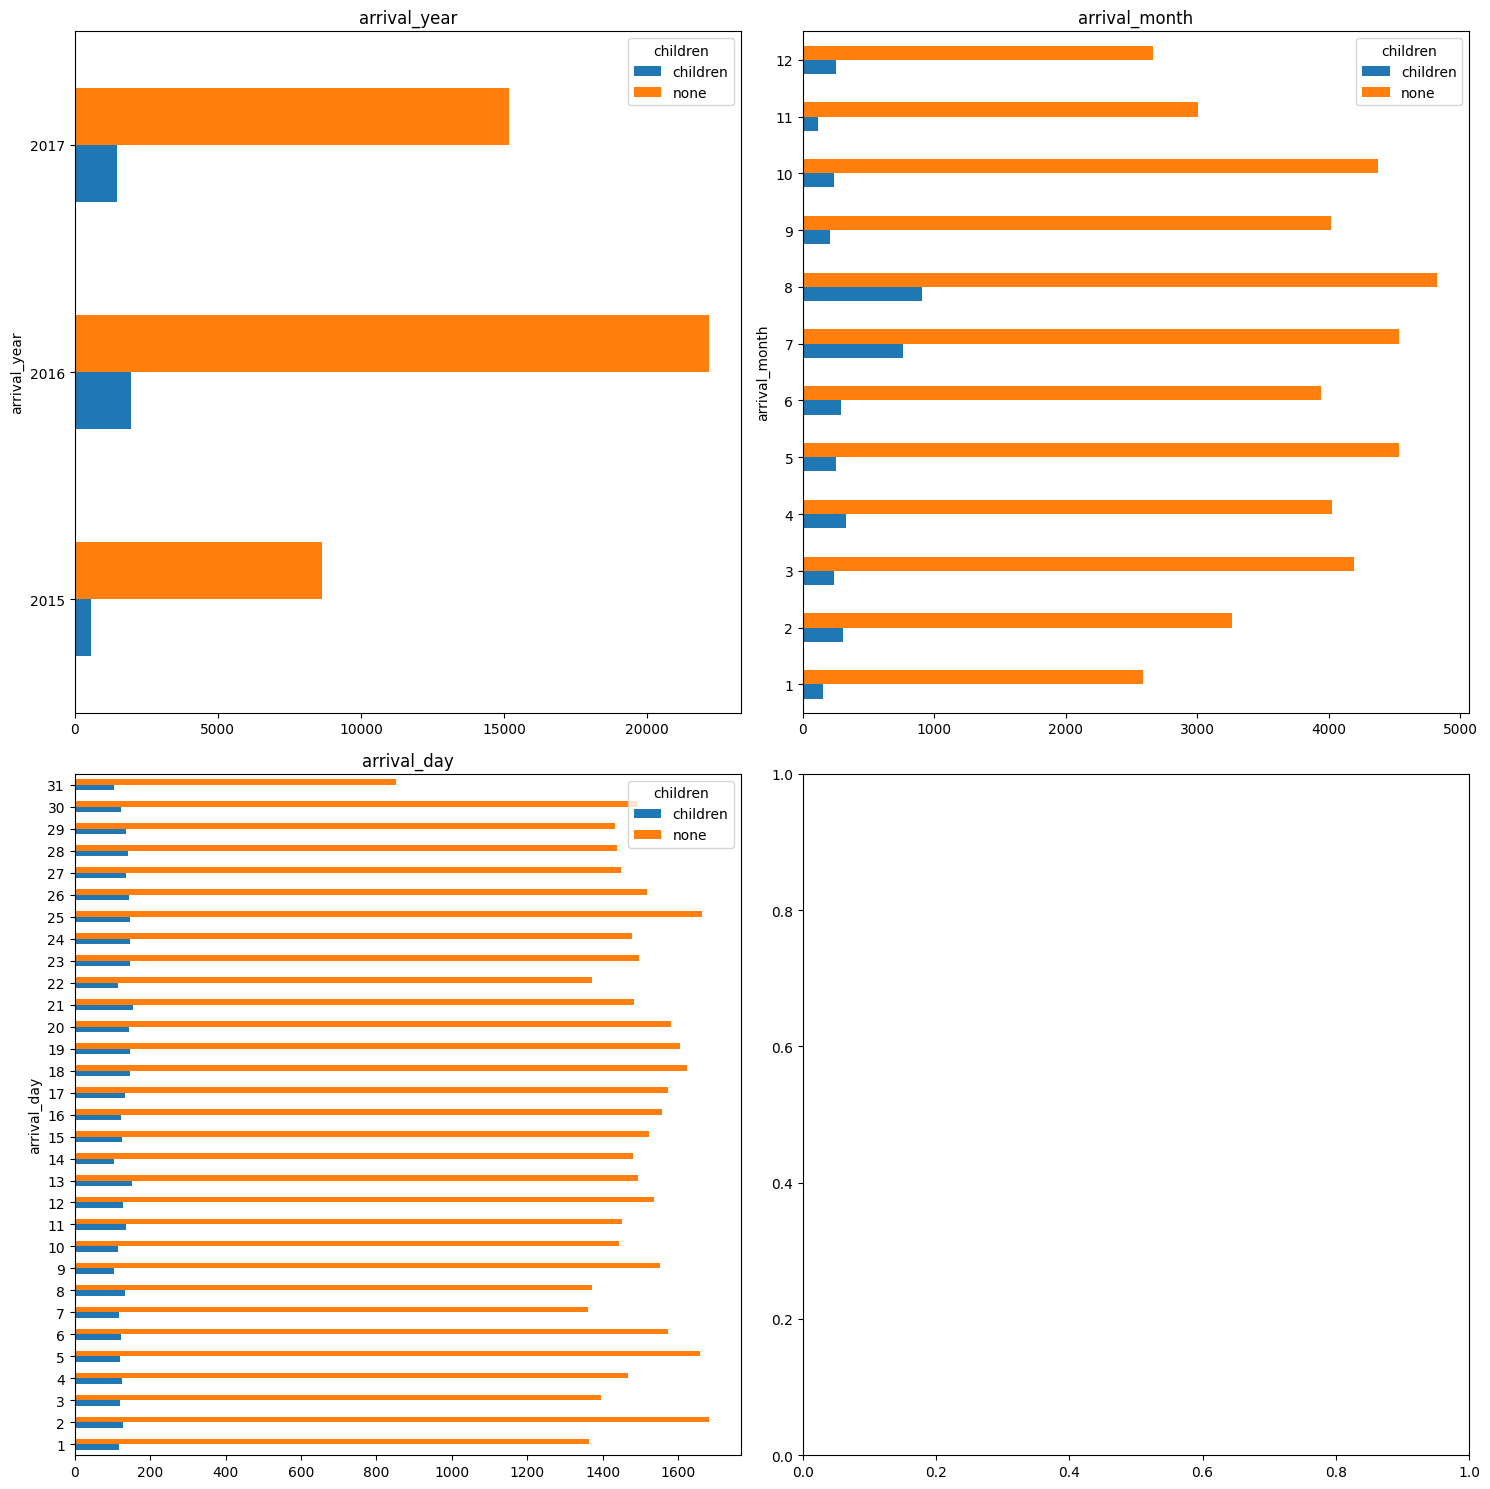

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.flatten()
col_axs = ["arrival_year","arrival_month","arrival_day"]

for col, ax in list(zip(col_axs, axs)):
    hotel_special_test.groupby([col, 'children']).size().unstack().plot(kind='barh', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

NOTES:
- Regarding YEARS: we can see that in the way the year increases the amount of children is increasing as well. This could means a association between the amount of children and the year.
- Regarding MONTH: we can see an increase of the amount of children in the month 7 and 8. This could be related with the summer holidays.
- Regarding DAY: there is no a clear relationship between the amount of children and day of the arrival day in the month.

## Conclusions and automation of getting training set

- Selected numeric columns: [`lead_time`, `adults`, `average_daily_rate`, `total_of_special_requests`, `total_nights`]
- The transformation for this set of data is the following: 
    - `lead_time` <= 300
    - `average_daily_rate` <= 300
    - `total_nights` <= 10
- We are going to automate the process using Quantile Method.
- Selected categoric columns: [`hotel`, `meal`, `market_segment`, `distribution_channel`, `reserved_room_type`, `assigned_room_type`, `customer_type`, `required_car_parking_spaces`, `has_booking_changes`]
- We are going to apply one hot encoding over these columns.
- Selected special columns: [`arrival_year`, `arrival_month`, `arrival_day`]

In [38]:
def get_whiskers(df: pd.DataFrame, col: str):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 2 * IQR
    upper_limit = Q3 + 2 * IQR
    return lower_limit, upper_limit    

In [39]:
def feature_extration(df: pd.DataFrame):
    new_df = df.copy()
    # Numeric columns treatment
    selected_numeric_cols = ['lead_time', 'adults', 'average_daily_rate', 'total_of_special_requests', 'total_nights']
    selected_features = selected_numeric_cols
    new_df["total_nights"] = new_df["stays_in_week_nights"] + new_df["stays_in_weekend_nights"]

    for col in selected_numeric_cols:
        lower_limit, upper_limit = get_whiskers(new_df, col)
        new_df = new_df[(new_df[col] >= lower_limit) & (new_df[col] <= upper_limit)]

    new_df = new_df[~((new_df["adults"]==0.0) & (new_df["children"]==0.0))]

    # Categorical columns treatment
    selected_categoric_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'required_car_parking_spaces', 'has_booking_changes']
    new_df.loc[:,"meal"] = new_df["meal"].apply(lambda x : "Undefined/SC" if x in ["SC","Undefined"] else x)
    new_df.loc[:,"has_booking_changes"] = new_df["booking_changes"].apply(lambda x : "0" if x == 0 else "1")
    drop_column_map = {
        'hotel': 'Resort_Hotel',
        'meal': 'Undefined/SC',
        'market_segment': 'Offline_TA/TO',
        'distribution_channel': 'Undefined',
        'reserved_room_type': 'L',
        'assigned_room_type': 'K',
        'customer_type': 'Group',
        'required_car_parking_spaces': 'none',
        'has_booking_changes': '0'
    }

    for col in selected_categoric_cols:
        dummies = pd.get_dummies(new_df[col], prefix=col, prefix_sep="_").astype(float).drop(f"{col}_{drop_column_map[col]}", axis=1)
        selected_features.extend(dummies.columns.to_list())
        new_df = pd.concat([new_df, dummies], axis=1)
        
    # Special columns treatment
    new_df["arrival_date"] = pd.to_datetime(new_df["arrival_date"])
    new_df.loc[:,"arrival_year"] = new_df["arrival_date"].dt.year
    new_df.loc[:,"arrival_month"] = new_df["arrival_date"].dt.month
    new_df.loc[:,"arrival_day"] = new_df["arrival_date"].dt.day
    selected_special_columns = ["arrival_year","arrival_month","arrival_day"]
    selected_features.extend(selected_special_columns)

    # target treatment
    new_df.loc[:,"children"] = new_df["children"].apply(lambda x : 1.0 if x=="children" else 0.0)

    new_df = new_df[selected_features + ["children"]].astype(float)
    new_df = new_df.reset_index(drop=True)
    return new_df


In [40]:
train_df = feature_extration(hotels_df)

In [41]:
train_df["children"].value_counts()

children
0.0    30389
1.0     3025
Name: count, dtype: int64

# Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In [42]:
train_df

,lead_time,adults,average_daily_rate,total_of_special_requests,total_nights,hotel_City_Hotel,meal_BB,meal_FB,meal_HB,market_segment_Aviation,...,assigned_room_type_I,customer_type_Contract,customer_type_Transient,customer_type_Transient-Party,required_car_parking_spaces_parking,has_booking_changes_1,arrival_year,arrival_month,arrival_day,children
0,217.0,2.0,80.75,1.0,4.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2016.0,9.0,1.0,0.0
1,2.0,2.0,170.00,3.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2017.0,8.0,25.0,0.0
2,95.0,2.0,8.00,2.0,7.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2016.0,11.0,19.0,0.0
3,143.0,2.0,81.00,1.0,8.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2016.0,4.0,26.0,0.0
4,67.0,2.0,49.09,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2016.0,3.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33409,172.0,2.0,73.39,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2016.0,10.0,7.0,1.0
33410,48.0,2.0,158.00,0.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2015.0,9.0,1.0,0.0
33411,155.0,2.0,82.50,1.0,4.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2017.0,7.0,26.0,0.0
33412,140.0,2.0,143.00,0.0,7.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2016.0,4.0,28.0,0.0


### Scaling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [44]:
X = train_df.drop("children", axis=1)
y = train_df["children"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
print("Class proportions in y_train:")
print({class_label: sum(y_train == class_label) for class_label in set(y_train)})
print("Class proportions in y_test:")
print({class_label: sum(y_test == class_label) for class_label in set(y_test)})

Class proportions in y_train:
{0.0: 24311, 1.0: 2420}
Class proportions in y_test:
{0.0: 6078, 1.0: 605}


## Models Comparation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [48]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

metrics = {}
conf_matrices = {}
roc_auc_data = {}

for name, model in models.items():    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    confusion = confusion_matrix(y_test, y_pred)
    
    metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    conf_matrices[name] = confusion
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

/Users/m.ulibarrie/anaconda3/envs/sent-t/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
pd.DataFrame(metrics)

,Logistic Regression,SVM,Decision Tree,Random Forest,Gradient Boosting,KNN
Accuracy,0.926829,0.930420,0.903187,0.937603,0.931318,0.928176
Precision,0.732000,0.786885,0.465000,0.819728,0.785156,0.698413
Recall,0.302479,0.317355,0.461157,0.398347,0.332231,0.363636


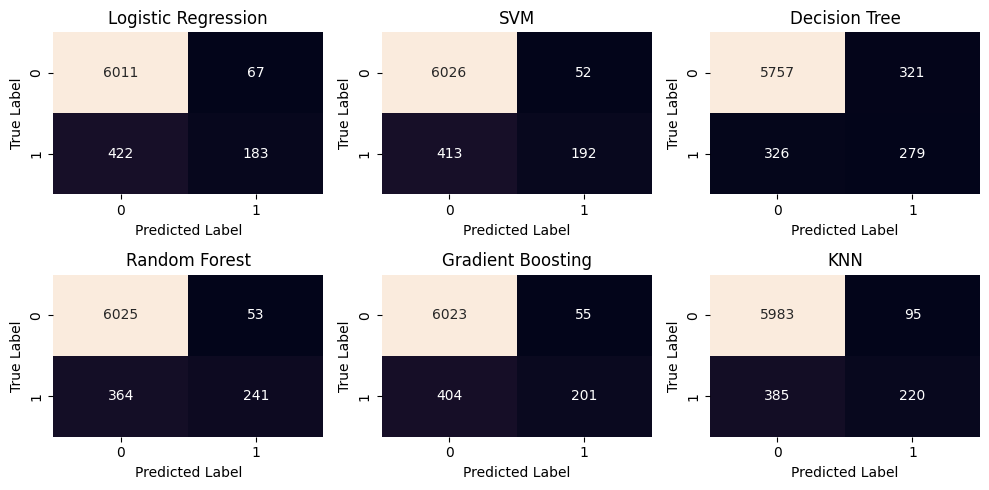

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs = axs.flatten()

for model_name, ax in list(zip(conf_matrices.keys(), axs)):
    cm = conf_matrices[model_name]
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

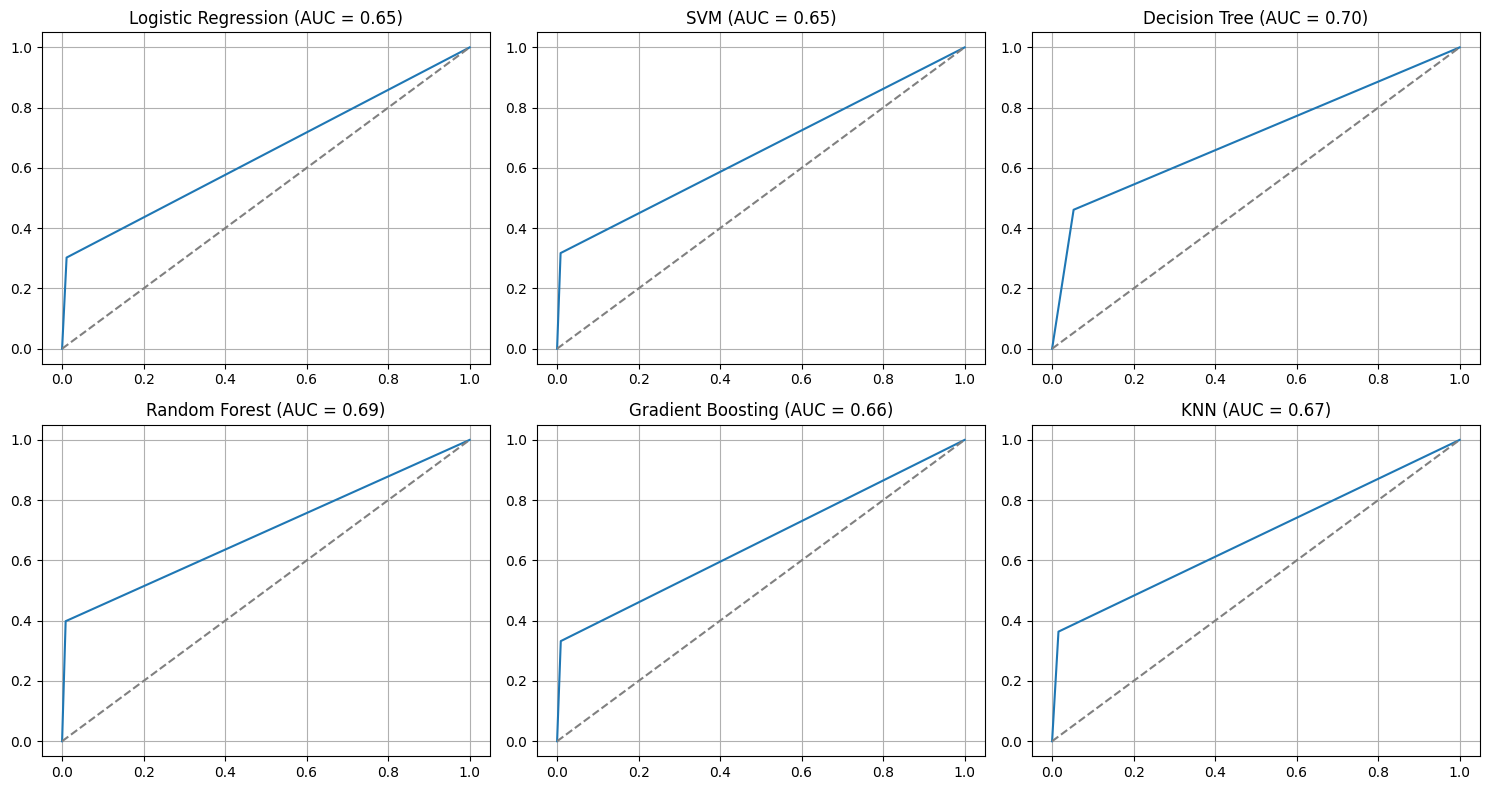

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for model_name, ax in list(zip(roc_auc_data.keys(), axs)):
    fpr = roc_auc_data[model_name]["fpr"]
    tpr = roc_auc_data[model_name]["tpr"]
    roc_auc = roc_auc_data[model_name]['roc_auc']
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.grid(True)
    ax.set_title(f"{model_name} (AUC = {roc_auc:.2f})")

plt.tight_layout()
plt.show()

Conclusion:
- Given the results above we can conclude that the best model so far to implement is `Random Forest`. As it has best results above others.
- This doesn't mean that this is the best model based on the data. There is some other experiments that we can do to improve the results.
    - Fix the unbalanced issued in children target as it can affect the final learning in the implemneted algorithms using others methods as Undersampling.
    - Re-explore features to checks if there is a missing feature or a feature that is not providing value to the target.
    - Explore each implemented model using Grid-Search looking for the best combination of hyperparameters.
    - Explore others more advanced algorithms as Neural Networks.

# Part III - Results & Conclusions

## Introduction

We are going to present the findings of our recent data analysis project, which aimed to predict whether guests would be accompanied by children based on hotel booking information. We'll delve into the insights gained from exploring the data and the outcomes of our predictive modeling efforts.

Our objective was to leverage machine learning techniques to anticipate the presence of children during hotel stays, using various factors provided in the booking data. This analysis holds significant implications for optimizing hotel operations and informing marketing strategies.

## Data Exploration

After diving into the data of the bookings information based on two hotels (Resort Holte and City Hotel) we found some keys insights to develop the best model to predict whether or not a person is going to be accompanied by children. The steps that we had done to accomplish that are the following:

- Exploratory Data Analysis: we were able to access the data and analize the main characteristics of the bookings that people had made. This information may include: "the amount of adults for the booking", "the type of meal", "the date that the person has arrived to the hotel", and others. Using this information we have made stadistical procedures to find relatioships between this information and the fact that the person was accompanied by children.
- Feature Engineering: We carefully crafted additional features from the existing data to enhance the predictive power of our models. For instance, we derived new variables such as "total nights", and "has booking changes".
- Modeling using Machine Learning models: we performed some machine learning techniques to develop predictive models capable of determining whether a person would be accompanied by children during their hotel stay. This involved preprocessing the data to handle missing values, encoding categorical variables, and scaling numerical features.
- Validation and Interpretation: Finally, we validated the chosen model on unseen data to assess its generalization ability. Additionally, we interpreted the model's predictions to gain insights into the underlying factors influencing the presence of children during hotel stays.

## Feature Importance 

In the following graph we can observe and compare some booking information that we were evaluating:
- `total_nights`: total amount of nights that the person stays at the hotel.
- `total_of_special_requests`: Number of special requests made by the customer (e.g. twin bed or high floor). Sum of all special requests.
- `average_daily_rate`: Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
- `adults`: Number of adults.
- `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

![num_features_imp](images/num_features_imp.png)

In this graph we can observe the level of importance to our target information if the person was accompanied by children using stadistical methods and we can find that the `average_daily_rate` is the most important characteristic to predict wheter or not our target followed by the `lead_time`.

Also regarding categorical data we could find the these are the best characteristics that ca be used for predicting if a person was accompanied by children:
- `hotel`: it could be a potencial feature as it can provide information about the which hotel.
- `meal`: Type of meal booked. Categories are presented in standard hospitality meal packages. In the data we can find that `Undefined` and `SC` are separate so we can join this two categories as they have the same meaning.
- `market_segment`: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.       
- `distribution_channel`: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.     
- `reserved_room_type`: Code of room type reserved. Code is presented instead of designation for anonymity reasons. Categories: ['A', 'D', 'F', 'C', 'B', 'E', 'G', 'H', 'L']
- `assigned_room_type`: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. Categories: ['A', 'K', 'F', 'C', 'D', 'E', 'I', 'B', 'G', 'H']
- `customer_type`: Type of booking, assuming one of four categories:
- `required_car_parking_spaces`: categorical column that indicates if if whether car parking spaces required by the customer or not. Categories: ['none', 'parking']
- `has_booking_changes`: if the person has changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.


Also we performed a stadistic method to find how related are these characteristics to the fact that the booking included children among the guests. All these presented characteristics presented important relationship with the target.


## Model Performance 

After conducting extensive model evaluation, we identified a model that exhibited highly promising performance metrics, indicating its efficacy in predicting whether guests would be accompanied by children during their hotel stays. Through rigorous evaluation techniques we ensured the robustness and reliability of our chosen model. Overall, our model evaluation process culminated in the selection of a highly effective predictive model, this model we conclude is `Random Forest`.

![model_results](images/model_results.png)

In the above image we can observe the following:
- Accuracy: It represents the proportion of correctly classified instances where the model correctly predicts whether a person is accompanied by children or not among all bookings. It indicates how often the model correctly identifies guests who are accompanied by children, as well as those who are not. A high accuracy suggests that the model is effective at correctly classifying both scenarios.
- Precision: It measures the proportion of correctly identified instances of guests accompanied by children among all instances where the model predicts that guests are accompanied by children. A high precision means that when the model predicts that a guest is accompanied by children, it is highly likely to be correct. 
- Recall: It measures the proportion of correctly identified instances of guests accompanied by children among all actual instances where guests are indeed accompanied by children. It indicates how well the model captures all instances of guests with children, ensuring that appropriate services or accommodations are provided to them. A high recall implies that the model effectively identifies most guests who are accompanied by children.

The model that presents the best result over these information is `Random Forest`

## Conclusions

Despite the results of the evaluations indicating that model `Random Forest` is the best based on the assessed data, we can still enhance their performance by conducting further evaluations using machine learning techniques and data exploration.

These next improvements can be achieved by performing:
- The data presents a unbalanced issue that can be fixed using machine learning techniques.
- Re-explore features to checks new relationships in the presented data.
- Perform a Fine tuning over the evaluated models.
- Explore others more advanced algorithms as Neural Networks.